0.7017847457627119
0.7695745762711864
0.8204169491525424
0.8712593220338983
0.939049152542373
1.0068389830508475
1.0576813559322034
1.1085237288135594
1.1593661016949155
1.1932610169491527
1.1932610169491527
1.2102084745762713
1.2441033898305087
1.2610508474576272
1.2949457627118646
1.328840677966102
1.3796830508474578
1.2271559322033898
1.3457881355932204
1.328840677966102
1.5491576271186442
1.566105084745763


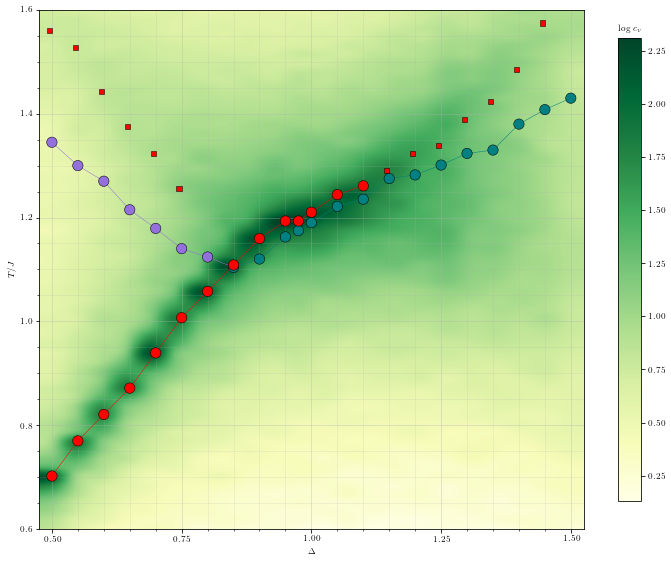

In [37]:
from __future__ import division
from __future__ import print_function
import numpy as np
from numpy.random import rand
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib.patches import Arrow, Circle, Rectangle
from matplotlib.patches import ConnectionPatch, Polygon

from matplotlib import rc
rc('font',**{'family':'sans-serif', 'size' : 10}) #, 'sans-serif':['Arial']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


#info on phase diagram
#black dot -> Q=1/3 vortices unbind
#red dot -> Q=1 vortices unbind
#green triangles -> cv max

#list of tcs at L=40
list_of_everything = np.loadtxt('tcs.data')


lambda3=2.1
#fraction=j2/j6

#temperature range
Tmax = 1.6
Tmax_plot = 1.6
Tmin = 0.6

figure_size = (3*3.4, 3*3.4)
fig = plt.figure(figsize = figure_size)
#fig = plt.figure()
#print(figure_size)

ax = plt.subplot(1,1,1)
#lambda = 0 KT points
tkt = 0.89
#plotting the two bare KT transitions

#all_cross = [[stiff_cross_j2, '*', 'black'], [sp_heat_cross_j2, '*', 'blue'], [binder_potts_j2, 'o', 'blue']]

#plot the black dotted box of the inside part
#plt.plot([0.5, 1.5], [Tmin, Tmin], color = 'black', linestyle = '--')
#plt.plot([0.5, 1.5], [Tmax, Tmax], color = 'black', linestyle = '--')

patches_stiff = []
patches_cv = []
patches_stiff2 = []
patches_cv2 = []
range_J2 = []

ixB = []
iyB = []
ixC = []
iyC = []

fP = []
fP_x = []

fKT1 = []
fKT1_x = []

fKT2 = []
fKT2_x = []


for i in range(len(list_of_everything)):
    vals = list_of_everything[i]
    if vals[3] == 0:
        col = 'mediumpurple'
    else:
        col = 'teal'

    patches_stiff.append(Circle((vals[0], vals[2]), radius=0.01, facecolor=col, edgecolor = 'black', linewidth = 0.5, zorder = 4))
    #patches_cv.append(Circle((vals[0], vals[1]), radius=0.01, facecolor='red', edgecolor = 'black'))
    patches_stiff2.append(Circle((vals[0], vals[2]), radius=0.01, facecolor=col, edgecolor = 'black', linewidth = 0.5, zorder = 4))
    #patches_cv2.append(Circle((vals[0], vals[1]), radius=0.01, facecolor='red', edgecolor = 'black'))
    range_J2.append(vals[0])

    if 0.85 <= vals[0] <= 1.1:
        ixB.append(vals[0])
        ixC.append(vals[0])
        iyB.append(vals[2])

    if vals[0] <= 1.1:
        fP_x.append(vals[0])

    if vals[0] <= 0.85:
        fKT1.append(vals[2])
        fKT1_x.append(vals[0])

    if 0.85 <= vals[0]:
        fKT2.append(vals[2])
        fKT2_x.append(vals[0])

range_J2 = np.array(range_J2)



N_cp = 40
Kc = 0.0


range_T = np.linspace(Tmin + 0.0001, Tmax, 60)


initial_cv_val = np.loadtxt('CV_data_pd.txt')
gridplot_cv = np.zeros((len(range_T), len(range_J2)))
for j in range(len(range_J2)):

    #cv
    #gridplot_cv[:,j] = (final_cv_val)
    #log of cv
    gridplot_cv[:,j] = np.log(initial_cv_val[:,j])

    #get cv_max for that size
    initial_cv_val_here = initial_cv_val[:,j]
    maxcv = range_T[np.where(initial_cv_val_here == np.max(initial_cv_val_here))[0][0]]
    print(maxcv)
    if range_J2[j] > 1.2:
        maxcv = list_of_everything[j][1]

    if range_J2[j] <= 1.1:
        patches_cv.append(Circle((range_J2[j], maxcv), radius=0.01, facecolor='red', edgecolor = 'black', linewidth = 0.5, zorder = 5))
        patches_cv2.append(Circle((range_J2[j], maxcv), radius=0.01, facecolor='red', edgecolor = 'black', linewidth = 0.5, zorder = 5))
    else:
        patches_cv.append(Rectangle((range_J2[j]- 0.01, maxcv - 0.01), 0.01, 0.01, facecolor='red', edgecolor = 'black', linewidth = 0.5, zorder = 5))
        patches_cv2.append(Rectangle((range_J2[j] - 0.01, maxcv - 0.01), 0.01, 0.01, facecolor='red', edgecolor = 'black', linewidth = 0.5, zorder = 5))

    if 0.85 <= range_J2[j] <= 1.1:
        iyC.append(maxcv)

    if range_J2[j] <= 1.1:
        fP.append(maxcv)
        
#adding second peaks
second_peaks = [57, 55, 50, 46, 43, 39];
for m in range(6):
    maxcv2 = range_T[second_peaks[m]]
    patches_cv.append(Rectangle((range_J2[m]- 0.01, maxcv2 - 0.01), 0.01, 0.01, facecolor='red', edgecolor = 'black', linewidth = 0.5, zorder = 5))

        

ixB = np.array(ixB)[::-1]
ixC = np.array(ixC)
iyB = np.array(iyB)[::-1]
iyC = np.array(iyC)

im = ax.imshow(gridplot_cv, interpolation='spline16', cmap='YlGn',origin='lower', extent = [0.5 - 0.025, 1.5 + 0.025, 0.6 - 1/(2*59), 1.6 + 1/(2*59)])

#fig.colorbar(im, shrink=0.5)

clb = plt.colorbar(im, shrink=0.65)
clb.ax.tick_params(labelsize=9)
# #clb.ax.set_title(r'$C_v/N$', fontsize = 12)
clb.ax.set_title(r'$\log \, c_v$', fontsize = 9)

#print(f'Potts (\Delta, T_3) = ({fP_x}, {fP}).')
#print(f'KT hexatic (\Delta, T_6) = ({fKT1_x}, {fKT1}).')
#print(f'KT nematic (\Delta, T_2) = ({fKT2_x}, {fKT2}).')


ax.plot(fP_x, fP, color = 'red', linewidth=0.5)
ax.plot(fKT1_x, fKT1, color = 'mediumpurple', linewidth=0.5)
ax.plot(fKT2_x, fKT2, color = 'teal', linewidth=0.5)

for p in patches_stiff:
    ax.add_patch(p)

for ps in patches_cv:
    ax.add_patch(ps)


plt.xlabel('$\Delta$', fontsize=9);
plt.ylabel('$T/J$', fontsize=9)

#ticks
major_ticks_x = np.arange(0.5, 1.5 + 0.01, 0.25)
minor_ticks_x = np.arange(0.5, 1.5 + 0.01, 0.05)
major_ticks_y = np.arange(0.6, 1.6 + 0.01, 0.2)
minor_ticks_y = np.arange(0.6, 1.6 + 0.01, 0.05)

tick_print_x = []
for elem in major_ticks_x:
    tick_print_x.append('${:.2f}$'.format(elem))

tick_print_y = []
for elem in major_ticks_y:
    tick_print_y.append('${:.1f}$'.format(elem))

ax.set_xticks(major_ticks_x)
ax.set_yticks(major_ticks_y)
ax.set_xticklabels(tick_print_x, fontsize = 9)
ax.set_yticklabels(tick_print_y, fontsize = 9)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(minor_ticks_y, minor=True)
#ax.set_xticklabels(tick_print, rotation=315)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.4)

#ax.set_xlim([0,2])
#ax.set_ylim([0,Tmax_plot])
#putting the x label away from the center
#ax.xaxis.set_label_coords(1.08, -0.03)


# Draw a line between the different points, defined in different coordinate
# systems.
#dotted lines for the two parameters studied
#ax.plot([1.0, 1.0], [0.6, 1.6], linestyle = '--', color = 'black', linewidth = 2)
#ax.plot([0.5, 0.5], [0.6, 1.6], linestyle = '--', color = 'black', linewidth = 2)
#
# textstr = r'ordered'
# ax.text(0.5, 0.30, textstr, transform=ax.transAxes, fontsize=30,
#     verticalalignment='top')
# textstr = r'hexatic'
# ax.text(0.05, 0.5, textstr, transform=ax.transAxes, fontsize=30,
#     verticalalignment='top')
# textstr = r'disordered'
# ax.text(0.35, 0.85, textstr, transform=ax.transAxes, fontsize=30,
#     verticalalignment='top')


#bbox= dict(boxstyle='square', fc="none", ec="k")
###########################
#####inset
###########################

ax.set_ylim([0.6, 1.6])
#ax.set_ylim([0,Tmax_plot])

#ax.indicate_inset_zoom(axins)

plt.tight_layout()
plt.show()

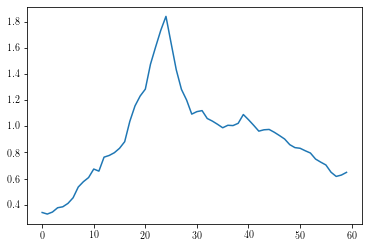

(array([10, 24, 31, 39], dtype=int64), {})

In [33]:
m = 5

plt.plot(gridplot_cv[:,m])
plt.show()

from scipy.signal import find_peaks

find_peaks(gridplot_cv[:,m], distance = 6)

In [27]:
from scipy.signal import find_peaks

find_peaks(gridplot_cv[:,1], distance = 6)

(array([10, 24, 31, 39], dtype=int64), {})